### Anirudh Agrawal 
### 220968380
### DSE IV B

# **Week 7**
## Naive Bayes Classifier

## NB2 Dataset

1. Import libraries
2. Import dataset
3. Exploratory data analysis 
4. Print the percentage of missing values in the categorical variables in the training set
5. Print categorical variables with missing data
6. Impute missing categorical variables with the most frequent value
7. Encode categorical variables
8. Declare feature vector and target variable
9. Split data into separate training and test set
10. Feature Scaling
11. Model training
12. Predict the results
13. Check the accuracy score
14. Compare the train-set and test-set accuracy
15. Visualize confusion matrix with seaborn heatmap
16. Generate Classification Report
17. Evaluate Classification accuracy
18. Evaluate Classification error
19. Calculate class probabilities and store the probabilities in data frame with appropriate heading
20. Plot histogram of predicted probabilities
21. Plot ROC Curve
22. Compute ROC AUC
23. Calculate cross-validated ROC AUC
24. Applying 10-Fold Cross Validation
25. Compute the Average cross-validation score

### 1. Import libraries

In [93]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('always')

### 2. Import dataset

In [94]:
df = pd.read_csv('NB2.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


### 3. Exploratory data analysis

In [95]:
df.shape

(9578, 14)

In [96]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [97]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [98]:
df['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [99]:
df['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [100]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [101]:
corr = df.corr(numeric_only=True)
corr

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


### 4. Print the percentage of missing values in the categorical variables in the training set

In [102]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### 5. Print categorical variables with missing data

In [103]:
print(df['credit.policy'].isna().sum())
print(df['purpose'].isna().sum())
print(df['inq.last.6mths'].isna().sum())
print(df['delinq.2yrs'].isna().sum())
print(df['pub.rec'].isna().sum())
print(df['not.fully.paid'].isna().sum())

0
0
0
0
0
0


### 6. Impute missing categorical variables with the most frequent value

In [104]:
df['purpose'].isnull().replace(df['purpose'].mode())
df['pub.rec'].isnull().replace(df['pub.rec'].mode())
df['not.fully.paid'].isnull().replace(df['not.fully.paid'].mode())

0       False
1       False
2       False
3       False
4       False
        ...  
9573    False
9574    False
9575    False
9576    False
9577    False
Name: not.fully.paid, Length: 9578, dtype: bool

### 7. Encode categorical variables

In [105]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 
  
# Encode labels in columns
df['purpose']= label_encoder.fit_transform(df['purpose'])

df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


### 8. Declare feature vector and target variable

In [106]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#### Independent Columns = All columns except Income
#### Dependent Columns = Income

### 9. Split data into separate training and test set

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=4)

### 10. Feature Scaling

In [108]:
from sklearn import preprocessing

X_train= preprocessing.normalize(X_train)
X_test= preprocessing.normalize(X_test)

# y_train= preprocessing.normalize(y_train)
# y_test= preprocessing.normalize(y_test)

### 11. Model training

In [109]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

bern_nb = BernoulliNB()
bern_nb.fit(X_train, y_train)

BernoulliNB()

In [110]:
mul_nb = MultinomialNB()
mul_nb.fit(X_train, y_train)

MultinomialNB()

In [111]:
gaus_nb = GaussianNB()
gaus_nb.fit(X_train, y_train)

GaussianNB()

### 12. Predict the results

In [112]:
y_pred_bern = bern_nb.predict(X_test)
y_pred_mul = mul_nb.predict(X_test)
y_pred_gaus = gaus_nb.predict(X_test)

### 13. Check the accuracy score

In [113]:
print ('Accuracy Score of Bernoulli Naive Bayes: ', metrics.accuracy_score(y_test, y_pred_bern))
print ('Accuracy Score of Multinomial Naive Bayes: ', metrics.accuracy_score(y_test, y_pred_mul))
print ('Accuracy Score of Gaussian Naive Bayes: ', metrics.accuracy_score(y_test, y_pred_gaus))

Accuracy Score of Bernoulli Naive Bayes:  0.8459290187891441
Accuracy Score of Multinomial Naive Bayes:  0.8459290187891441
Accuracy Score of Gaussian Naive Bayes:  0.8083507306889353


### 14. Compare the train-set and test-set accuracy

In [114]:
#Train Set Accuracy for all 3 models
train_accuracy = []
train_accuracy.append(bern_nb.score(X_train, y_train))
train_accuracy.append(mul_nb.score(X_train, y_train))
train_accuracy.append(gaus_nb.score(X_train, y_train))


#Test Set Accuracy for all 3 models
test_accuracy = []
test_accuracy.append(metrics.accuracy_score(y_test, y_pred_bern))
test_accuracy.append(metrics.accuracy_score(y_test, y_pred_mul))
test_accuracy.append(metrics.accuracy_score(y_test, y_pred_gaus))

print ('Training Set Accuracies: ', train_accuracy)
print ('Testing Set Accuracies: ', test_accuracy)

Training Set Accuracies:  [0.8380899345677294, 0.8379507169706251, 0.7931226507030489]
Testing Set Accuracies:  [0.8459290187891441, 0.8459290187891441, 0.8083507306889353]


#### Hence we observe that all models are well fit, as corresponding Train-Test accuracy pair for each model is *very close*.
#### Also, the variation in accuracies across models is marginal. However, the Bernoulli NB and Multinomial NB models are best fit, followed by the Gaussian NB model. 

### 15. Visualize confusion matrix with seaborn heatmap

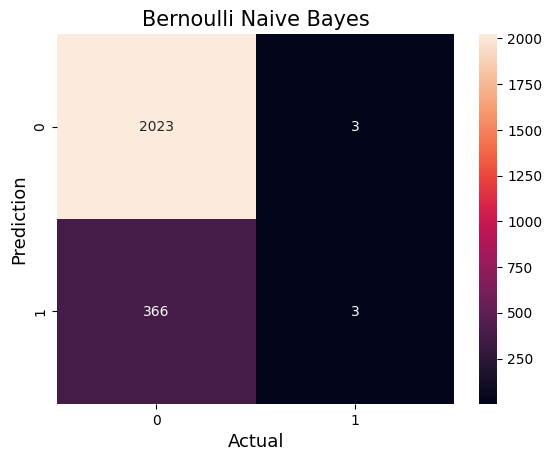

In [115]:
conf_mat = metrics.confusion_matrix(y_test,y_pred_bern)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Bernoulli Naive Bayes',fontsize=15)
plt.show()

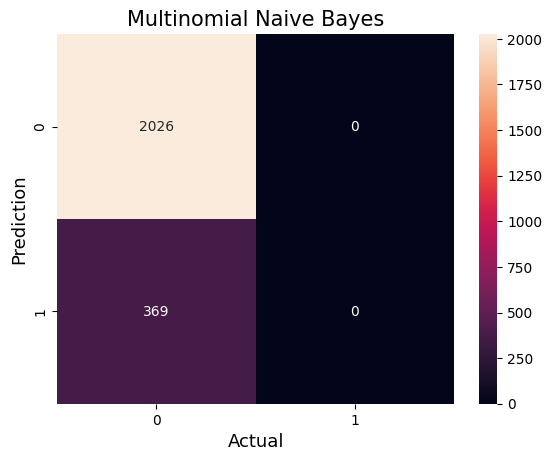

In [116]:
conf_mat = metrics.confusion_matrix(y_test,y_pred_mul)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Multinomial Naive Bayes',fontsize=15)
plt.show()

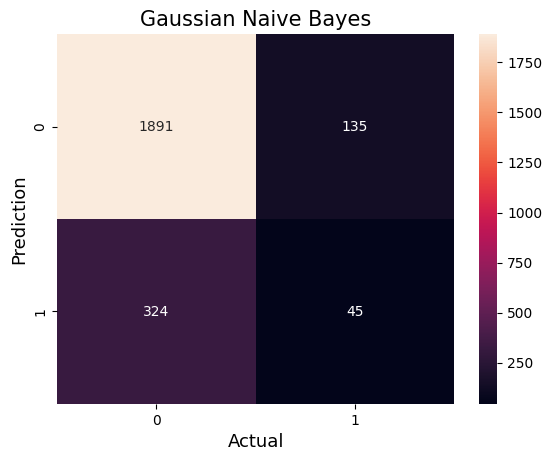

In [117]:
conf_mat = metrics.confusion_matrix(y_test,y_pred_gaus)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Gaussian Naive Bayes',fontsize=15)
plt.show()

### 16. Generate Classification Report

In [118]:
print('*******Bernoulli Naive Bayes: \n', metrics.classification_report(y_test, y_pred_bern))
print('*******Multinomial Naive Bayes: \n', metrics.classification_report(y_test, y_pred_mul))
print('*******Gaussian Naive Bayes: \n', metrics.classification_report(y_test, y_pred_gaus))

*******Bernoulli Naive Bayes: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2026
           1       0.50      0.01      0.02       369

    accuracy                           0.85      2395
   macro avg       0.67      0.50      0.47      2395
weighted avg       0.79      0.85      0.78      2395

*******Multinomial Naive Bayes: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2026
           1       0.00      0.00      0.00       369

    accuracy                           0.85      2395
   macro avg       0.42      0.50      0.46      2395
weighted avg       0.72      0.85      0.78      2395

*******Gaussian Naive Bayes: 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      2026
           1       0.25      0.12      0.16       369

    accuracy                           0.81      2395
   macro avg       0.55      0.

C:\Users\Mangalam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mangalam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mangalam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### 17. Evaluate Classification accuracy

In [119]:
print ('Classification Accuracy of Binomial Naive Bayes: ', bern_nb.score(X_test, y_test))
print ('Classification Accuracy of Multinomial Naive Bayes: ', mul_nb.score(X_test, y_test))
print ('Classification Accuracy of Gaussian Naive Bayes: ', gaus_nb.score(X_test, y_test))

Classification Accuracy of Binomial Naive Bayes:  0.8459290187891441
Classification Accuracy of Multinomial Naive Bayes:  0.8459290187891441
Classification Accuracy of Gaussian Naive Bayes:  0.8083507306889353


### 18. Evaluate Classification error

In [120]:
print ('Classification Error of Binomial Naive Bayes: ', 1-bern_nb.score(X_test, y_test))
print ('Classification Error of Multinomial Naive Bayes: ', 1-mul_nb.score(X_test, y_test))
print ('Classification Error of Gaussian Naive Bayes: ', 1-gaus_nb.score(X_test, y_test))

Classification Error of Binomial Naive Bayes:  0.15407098121085594
Classification Error of Multinomial Naive Bayes:  0.15407098121085594
Classification Error of Gaussian Naive Bayes:  0.19164926931106474


### 19. Calculate class probabilities and store the probabilities in data frame with appropriate heading

In [121]:
#predict_proba() is used to predict predicted class probabilities

class_prob1={}
class_prob2={}
class_prob3={}

bern_pred_class_0 = bern_nb.predict_proba(X_test)[:,0]
bern_pred_class_1 = bern_nb.predict_proba(X_test)[:,1]

mul_pred_class_0 = mul_nb.predict_proba(X_test)[:,0]
mul_pred_class_1 = mul_nb.predict_proba(X_test)[:,1]

gaus_pred_class_0 = gaus_nb.predict_proba(X_test)[:,0]
gaus_pred_class_1 = gaus_nb.predict_proba(X_test)[:,1]


class_prob1[0] = np.mean(bern_pred_class_0,axis=0)
class_prob1[1] = np.mean(bern_pred_class_1,axis=0)
class_prob2[0] = np.mean(mul_pred_class_0,axis=0)
class_prob2[1] = np.mean(mul_pred_class_1,axis=0)
class_prob3[0] = np.mean(gaus_pred_class_0,axis=0)
class_prob3[1] = np.mean(gaus_pred_class_1,axis=0)

class_probabilities1 = pd.DataFrame(class_prob1, index=['Bernoulli'])
class_probabilities2 = pd.DataFrame(class_prob2, index=['Multinomial'])
class_probabilities3 = pd.DataFrame(class_prob3, index=['Gaussian'])

print(class_probabilities1)
print(class_probabilities2)
print(class_probabilities3)

                  0         1
Bernoulli  0.836445  0.163555
                    0         1
Multinomial  0.838703  0.161297
                 0         1
Gaussian  0.892069  0.107931


#### *We note that the Gaussian model has a slightly higher probability of classifying the target variable as class 0 ('not.fully.paid' column)*

### 20. Plot histogram of predicted probabilities

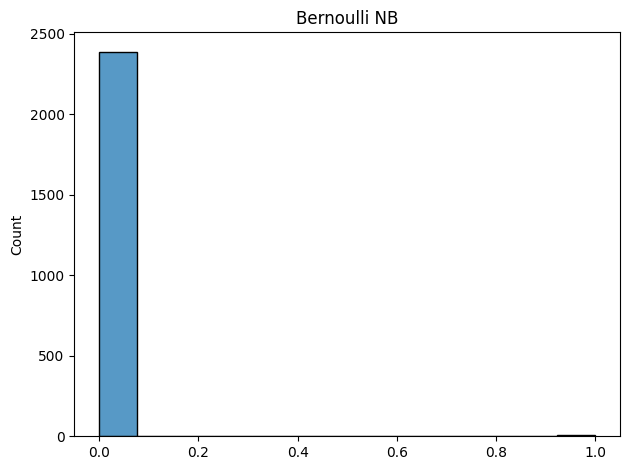

In [122]:
sns.histplot(y_pred_bern)
plt.title('Bernoulli NB')
plt.tight_layout()

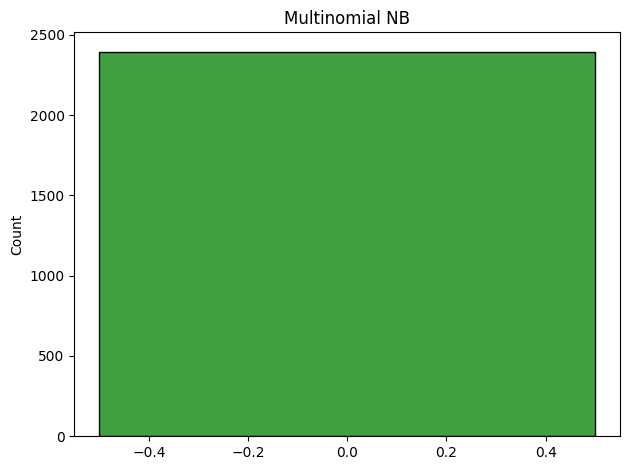

In [123]:
sns.histplot(y_pred_mul, color='g')
plt.title('Multinomial NB')
plt.tight_layout()

#### *The graph appears such because the Multinomial Naive Bayes model assumes that the data follows Multinomial Distribution, and is not very well suited for this sort of problem and dataset. However, we are implementing Multinomial NB as well for the sake of research and analysis.*

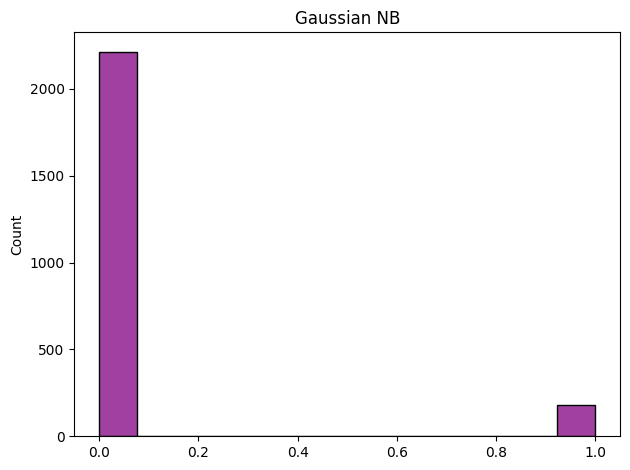

In [124]:
sns.histplot(y_pred_gaus, color='purple')
plt.title('Gaussian NB')
plt.tight_layout()

### 21. Plot ROC Curve

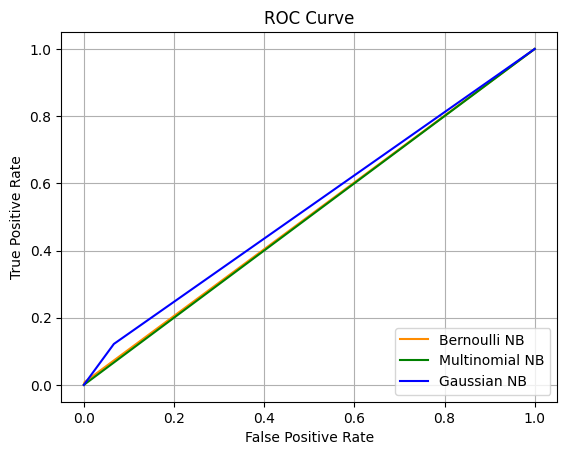

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr1, tpr1, thresholds1 = roc_curve(y_test,y_pred_bern)
fpr2, tpr2, thresholds2 = roc_curve(y_test,y_pred_mul)
fpr3, tpr3, thresholds3 = roc_curve(y_test,y_pred_gaus)

plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', label='Bernoulli NB')
plt.plot(fpr2, tpr2, color='g', label='Multinomial NB')
plt.plot(fpr3, tpr3, color='b', label='Gaussian NB')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()

### 22. Compute ROC AUC

In [126]:
print("ROC-AUC Score for Bernoulli NB = ", roc_auc_score(y_test, y_pred_bern))
print("ROC-AUC Score for Multinomial NB = ", roc_auc_score(y_test, y_pred_mul))
print("ROC-AUC Score for Gaussian NB = ", roc_auc_score(y_test, y_pred_gaus))

ROC-AUC Score for Bernoulli NB =  0.5033246655270106
ROC-AUC Score for Multinomial NB =  0.5
ROC-AUC Score for Gaussian NB =  0.5276587292032842


#### *Hence we observe that ROC graph for all models are very close. Comparatively, Gaussian NB has greatest Area under Curve, followed by Bernoulli NB and then Multinomial NB.*

### 23. Calculate cross-validated ROC AUC

In [127]:
#Note: Here we find ROC AUC for training dataset (X_train and y_train)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold=KFold(n_splits=3,random_state=5,shuffle=True)
roc_score1 = cross_val_score(bern_nb, X_train, y_train, cv=kfold, scoring='roc_auc')
roc_score2 = cross_val_score(mul_nb, X_train, y_train, cv=kfold, scoring='roc_auc')
roc_score3 = cross_val_score(gaus_nb, X_train, y_train, cv=kfold, scoring='roc_auc')
print('Cross-validated ROC AUC score of Bernoulli NB: ', np.mean(roc_score1))
print('Cross-validated ROC AUC score of Multinomial NB: ', np.mean(roc_score2))
print('Cross-validated ROC AUC score of Gaussian NB: ', np.mean(roc_score3))

Cross-validated ROC AUC score of Bernoulli NB:  0.616841877987237
Cross-validated ROC AUC score of Multinomial NB:  0.5538793844447026
Cross-validated ROC AUC score of Gaussian NB:  0.5994443189399731


### 24. Applying 10-Fold Cross Validation

In [128]:
#Note: Here we find ROC AUC for complete dataset (X and y)

cv = KFold(n_splits=10, random_state=None, shuffle=False)

scores_bern = cross_val_score(bern_nb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_mul = cross_val_score(mul_nb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_gaus = cross_val_score(gaus_nb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

### 25. Compute the Average cross-validation score

In [129]:
print("Mean Accuracy for 10 splits for Bernoulli NB:", (np.mean(scores_bern)))
print("Mean Accuracy for 10 splits for Multinomial NB:", (np.mean(scores_mul)))
print("Mean Accuracy for 10 splits for Gaussian NB:", (np.mean(scores_gaus)))

Mean Accuracy for 10 splits for Bernoulli NB: 0.8389796750893863
Mean Accuracy for 10 splits for Multinomial NB: 0.6697387451652803
Mean Accuracy for 10 splits for Gaussian NB: 0.8190247446024568
